In [42]:
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
consumer_key = "1sm7hTMjPTdXu2mFfeWJsikf0"
consumer_secret = "aKhmx7c1drEDpYdccAHY7hHAI0noK0smHGvY9DsuYSRx9HbvZI"
access_token = "87224280-ckwf0MKGRapPC7VeofaAbt8BGVhwAdqXivI9BEDN0"
access_token_secret = "NbC8SeBhOTvnWRThnbfRtdja05Wqc5rBonyX9LAzxr5Am"


In [44]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [45]:
target_terms = ("@CNN", "@BBCWORLD", "@CBSNEWS", "@FOXNEWS", "@NYTIMES")

In [46]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [47]:
for x in range(5):
    for user in target_terms:
        public_tweets = api.user_timeline(target_terms, count=100)

        
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            positive = analyzer.polarity_scores(tweet["text"])["pos"]
            negative = analyzer.polarity_scores(tweet["text"])["neg"]
            neutral = analyzer.polarity_scores(tweet["text"])["neu"]
          
            
            compound_list.append(compound)
            positive_list.append(positive)
            negative_list.append(negative)
            neutral_list.append(neutral)


In [48]:
sentiment = {"User": target_terms,
             "Compound": np.mean(compound_list),
             "Positive": np.mean(positive_list),
             "Neutral": np.mean(negative_list),
             "Negative": np.mean(neutral_list),
             "Tweet Count": len(compound_list)}


In [49]:
print(sentiment)
   
print("")


{'User': ('@CNN', '@BBCWORLD', '@CBSNEWS', '@FOXNEWS', '@NYTIMES'), 'Compound': 0.043953608247422685, 'Positive': 0.10310309278350514, 'Neutral': 0.070783505154639159, 'Negative': 0.82611340206185557, 'Tweet Count': 2425}



In [40]:
sentiment

{'Compound': 0.043953608247422685,
 'Negative': 0.82611340206185557,
 'Neutral': 0.070783505154639159,
 'Positive': 0.10310309278350514,
 'Tweet Count': 2425,
 'User': ('@CNN', '@BBCWORLD', '@CBSNEWS', '@FOXNEWS', '@NYTIMES')}

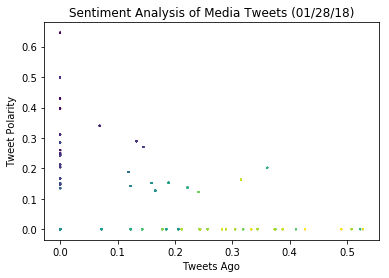

In [50]:
plt.scatter(positive_list, negative_list, neutral_list, compound_list)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (01/28/18)")
plt.show()